# Projects

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/git/https%3A%2F%2Fgitlab.in2p3.fr%2Fenergy4climate%2Fpublic%2Feducation%2Fmachine_learning_for_climate_and_energy/master?filepath=book%2Fnotebooks%2Fprojects.ipynb)

<div class="alert alert-block alert-warning">
    <b>Schedule</b>
    
- Ask your supervisors for the data if not already provided (it is not included in this repository).
- Quick presentation.
- Final project presentation.
    
</div>

<div class="alert alert-block alert-info">
    <b>One problematic, One dataset, One (or more) method(s)</b>
    
- Quality of the dataset is key.
- Results on a clean notebook.
- Explain which method(s) you used and why.
- If a method fails, explain why.

</div>

## Monitoring the atmospheric variable from space

Author: V. Pellet

In situ measurement of atmospheric composition is only possible at an extremely local level and mainly possible in industrialised and densely populated countries. The atmospheric composition is therefore most of the time measured through remote sensing techniques.

The spectral signatures (i.e. radiance or Brightness temperature BT) associated with the transfer of electromagnetic radiation through the atmosphere (Radiative Transfer) are the main source of information about its composition. The spectra are function of the different gases present in the atmosphere and this measurement enable then their concentration to be determined.

The radiative transfer theorie accounts for all the processes that can impact the radiation as it passes through the atmosphere. It is used to calculate the Brightness Temperature BT at a point in the atmosphere from the geophysical variables v. 

RT : v ⇒ T B

The aim of remote sensing is therefore to invert the previous equation and thus find the profile of the geophysical variable v from the measurements of the spectral signatures BT: 

restitution: BT ⇒ v

There is no pure physical model for inverse radiative transfer, and machine learning methods are therefore used.

### Mission presentation
We are interested in a potential new satellite mission: the first microwave hyperspectral sounder. Hyperspectral characterized a instrument that allow to measure spectrum over hundred (or thousand) frequencies at fine spectral resolution to better infer atmospheric composition (temperature and humidity profiles over the "pres_level= 91" pressure levels). Here the the instrument is comprised of a set of "freq=251" frequencie (i.e. channels) with characteristic frequencies between 50 Ghz and 450 Ghz and located around the absorption frequencies of $O_2$ for temperature sounding and $H_2O$ for humidity sounding (see table 2.1). The measurements made by these channels are the radiation (Brightness Temperatures, BT) emitted by a column of atmosphere in a given direction and calculated using the Radiative Transfer calculation at "nb_prof=1989" locations. Figure 2.2 shows the spectral signature (Brightness Temperature) of a column of atmosphere on the channels (right) and around 60 GHz in particular (left).



<img alt="weather" src="images/spectre_mw.png" width=400 style="float:right">
<img alt="weather" src="images/Table_mw.png" width=400 style="float:left">

### Key information
- The satellite observations are noisy but hopefully, we have information about the noise over each channel.
- Regarding the monitoring of the temperature we also have the Jacobian "Jac_temp" which indicate the sensitivity of the "freq=251" BT observations to the temperature (T) at the "pres_level= 91" pressure levels.
- Due to operational constraints, not all the frequencies can be used to retrieve atmospheric composition and only a subset must be selected : the subset will be limited to 50 "pieces of information" (real channels or any combinations of them).

### Project objectives
<div class="alert alert-block alert-info">

- Assess the atmospheric variables and the Microwave Brigthness Temperature (i.e. radiance) from a hyperspectral satellite instrument global scale.
- Estimate the atmospheric variables (first near-surface temperature, entire temperature profile and then humidity profile) <b> using a subpart of the satellite observations limited to 50 "pieces of information" (channels or combinations) </b> plus auxiliary information if needed.
</div>

### Dataset

- Observed noisy satellite microwave measurements (i.e. Brigthness temperature) at "freq=251" frequencies (i.e. "channels") sampling absorption bands in microwave spectrum
- Information about the "SIGMA" (i.e. STD) of the noise over each channel (assumed gaussian with no bias)
- Atmospheric variables (temperature and humidity profile over "pres_level=91" levels of atmospheric presure) collocated with the satellite measurements in space (no time information) at 'nb_prof=1989" locations.
- Sensitivity of the different channels to the temperature (how much the measurement at a given frequency is sensitive to the temperature)
- Surface information (land/sea ratio, latitude, longitude)

### First steps


- Read about microwave satellite remote sensing
- Assess both satellite measurement and atmospheric variables
- Estimate near-surface temperature from space
- Estimate the entire temperature profile from space
- Start with the easy predictions and move on to harder ones

In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import xarray as xr


In [2]:
# Set data directory
dir0 = Path('../../../data/projects/microwave')
mw_filename = 'MW_instr.nc'
mw_filepath = Path(dir0, mw_filename)
ds = xr.open_dataset(mw_filepath)

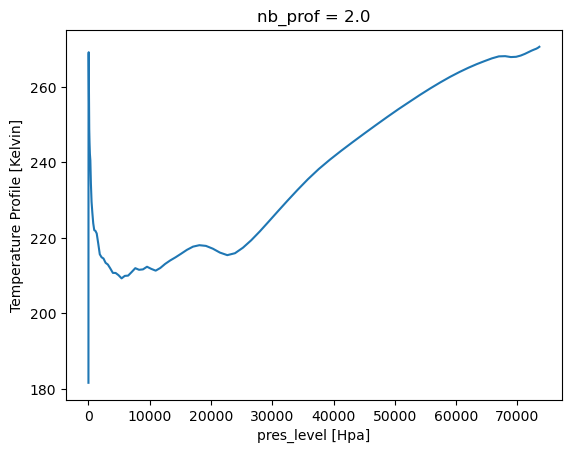

In [3]:
ds.T[:,1].plot()

The plot above is a typical temperature profile.
- Do you recognize some characteristic features of a temperature profile?
- Can you plot the humidity profile?
- Is this profile over the land? over the sea?

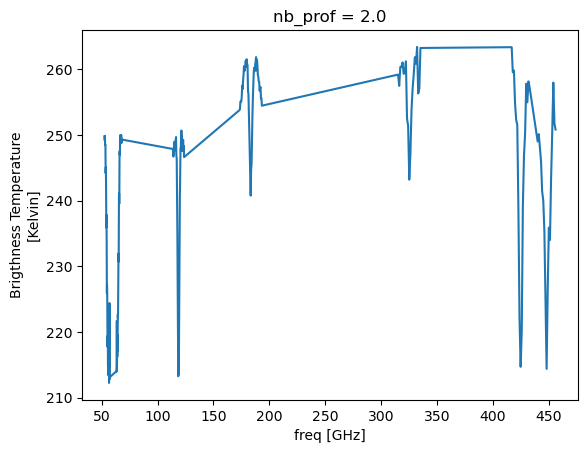

In [4]:
ds.BT[:,1].plot()

Here is a Brightness temperature for a given profile
- How is BT related to temperature? (Plot BT and T for different profiles)
- Which bands are you going to use to analyze the temperature profile? (cf. Table 2.1)

***
## Credit

[//]: # "This notebook is part of [E4C Interdisciplinary Center - Education](https://gitlab.in2p3.fr/energy4climate/public/education)."
Contributors include Bruno Deremble and Alexis Tantet.
Several slides and images are taken from the very good [Scikit-learn course](https://inria.github.io/scikit-learn-mooc/).

<br>

<div style="display: flex; height: 70px">
    
<img alt="Logo LMD" src="images/logos/logo_lmd.jpg" style="display: inline-block"/>

<img alt="Logo IPSL" src="images/logos/logo_ipsl.png" style="display: inline-block"/>

<img alt="Logo E4C" src="images/logos/logo_e4c_final.png" style="display: inline-block"/>

<img alt="Logo EP" src="images/logos/logo_ep.png" style="display: inline-block"/>

<img alt="Logo SU" src="images/logos/logo_su.png" style="display: inline-block"/>

<img alt="Logo ENS" src="images/logos/logo_ens.jpg" style="display: inline-block"/>

<img alt="Logo CNRS" src="images/logos/logo_cnrs.png" style="display: inline-block"/>
    
</div>

<hr>

<div style="display: flex">
    <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0; margin-right: 10px" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a>
    <br>This work is licensed under a &nbsp; <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.
</div>